In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
cd /home/ildefonso/Documents/repos/vocalpy/scipy-proceedings-2023-vak

/home/ildefonso/Documents/repos/vocalpy/scipy-proceedings-2023-vak


In [3]:
def munge_df(df):  
    df['avg_err'] = (1.0 - df['avg_val_acc']) * 100
    df['avg_err_tfm'] = (1.0 - df['avg_val_acc_tfm']) * 100
    df['avg_segment_error_rate'] = df['avg_val_segment_error_rate'] * 100
    df['avg_segment_error_rate_tfm'] = df['avg_val_segment_error_rate_tfm'] * 100

    df_out = []

    for value_vars, value_name in zip(
        (
            ['avg_segment_error_rate', 'avg_segment_error_rate_tfm'],
            ['avg_err', 'avg_err_tfm'],
        ),
        (
            'Average Segment Error Rate', 'Average Error',
        )
        
    ):
        melted = pd.melt(df, id_vars=['train_dur', 'replicate_num', 'model_name'],
                         value_vars=value_vars,
                         var_name='postprocess',
                         value_name=value_name,
                        )
        post_process_map = dict(zip(value_vars, (False, True)))
        melted['postprocess'] = melted['postprocess'].map(post_process_map)
        df_out.append(melted)

    df_out = pd.merge(*df_out)
    return df_out

In [4]:
sns.set_context("talk")
sns.set(font_scale=1.5)


def plot_learncurve(df, bird_id):
    fig, ax_arr = plt.subplots(1, 2, figsize=(12, 7), dpi=300)

    for ax_ind, err_name in enumerate(('Average Error', 'Average Segment Error Rate')):
        ax = ax_arr[ax_ind]

        g = sns.lineplot(
            data=df,
            x='train_set_dur',
            y=err_name,
            hue='postprocess',
            palette='pastel',
            style='Input',
            ax=ax,
        )
        if ax_ind == 0:
            ax.legend().remove()
        else:
            sns.move_legend(ax, loc='upper right')

    for ax_ind, ylim in enumerate(([0, 4], [0, 25])):
        ax_arr[ax_ind].set_ylim(ylim)
    
    fig.suptitle(f'{bird_id}')
    fig.tight_layout()

In [5]:
RESULTS_ROOT = pathlib.Path('./results/BFSongRepo')

In [14]:
BIRD_IDS = [
    'bl26lb16',
    'gy6or6',
#    'gr41rd51',
    'or60yw70',
]

NET_NAMES = [
    'TweetyNet',
    'ED_TCN',
    #'TweetyNoLSTMNet',
]

In [15]:
data = []
for bird_id in BIRD_IDS:
    bird_root = RESULTS_ROOT / bird_id
    for net_name in NET_NAMES:
        net_root = bird_root / net_name
        results_dir = sorted(net_root.glob('results_*'))
        assert len(results_dir) == 1, f"results dir: {results_dir}"
        results_dir = results_dir[0]
        csv_path = results_dir / 'learning_curve.csv'
        df = pd.read_csv(csv_path)
        df = munge_df(df)
        df['net_name'] = net_name
        df['bird_id'] = bird_id
        data.append(df)

data = pd.concat(data)

In [16]:
df.head()

,train_dur,replicate_num,model_name,postprocess,Average Segment Error Rate,Average Error,net_name,bird_id
0,30.0,1,ED_TCN,False,14.812205,4.275006,ED_TCN,or60yw70
1,30.0,2,ED_TCN,False,18.948705,3.504860,ED_TCN,or60yw70
2,30.0,3,ED_TCN,False,13.268552,3.110963,ED_TCN,or60yw70
3,30.0,4,ED_TCN,False,14.878601,3.941023,ED_TCN,or60yw70
4,30.0,5,ED_TCN,False,14.385977,4.045677,ED_TCN,or60yw70


/tmp/ipykernel_795760/3330990110.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(
/tmp/ipykernel_795760/3330990110.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(
/tmp/ipykernel_795760/3330990110.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(
/tmp/ipykernel_795760/3330990110.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


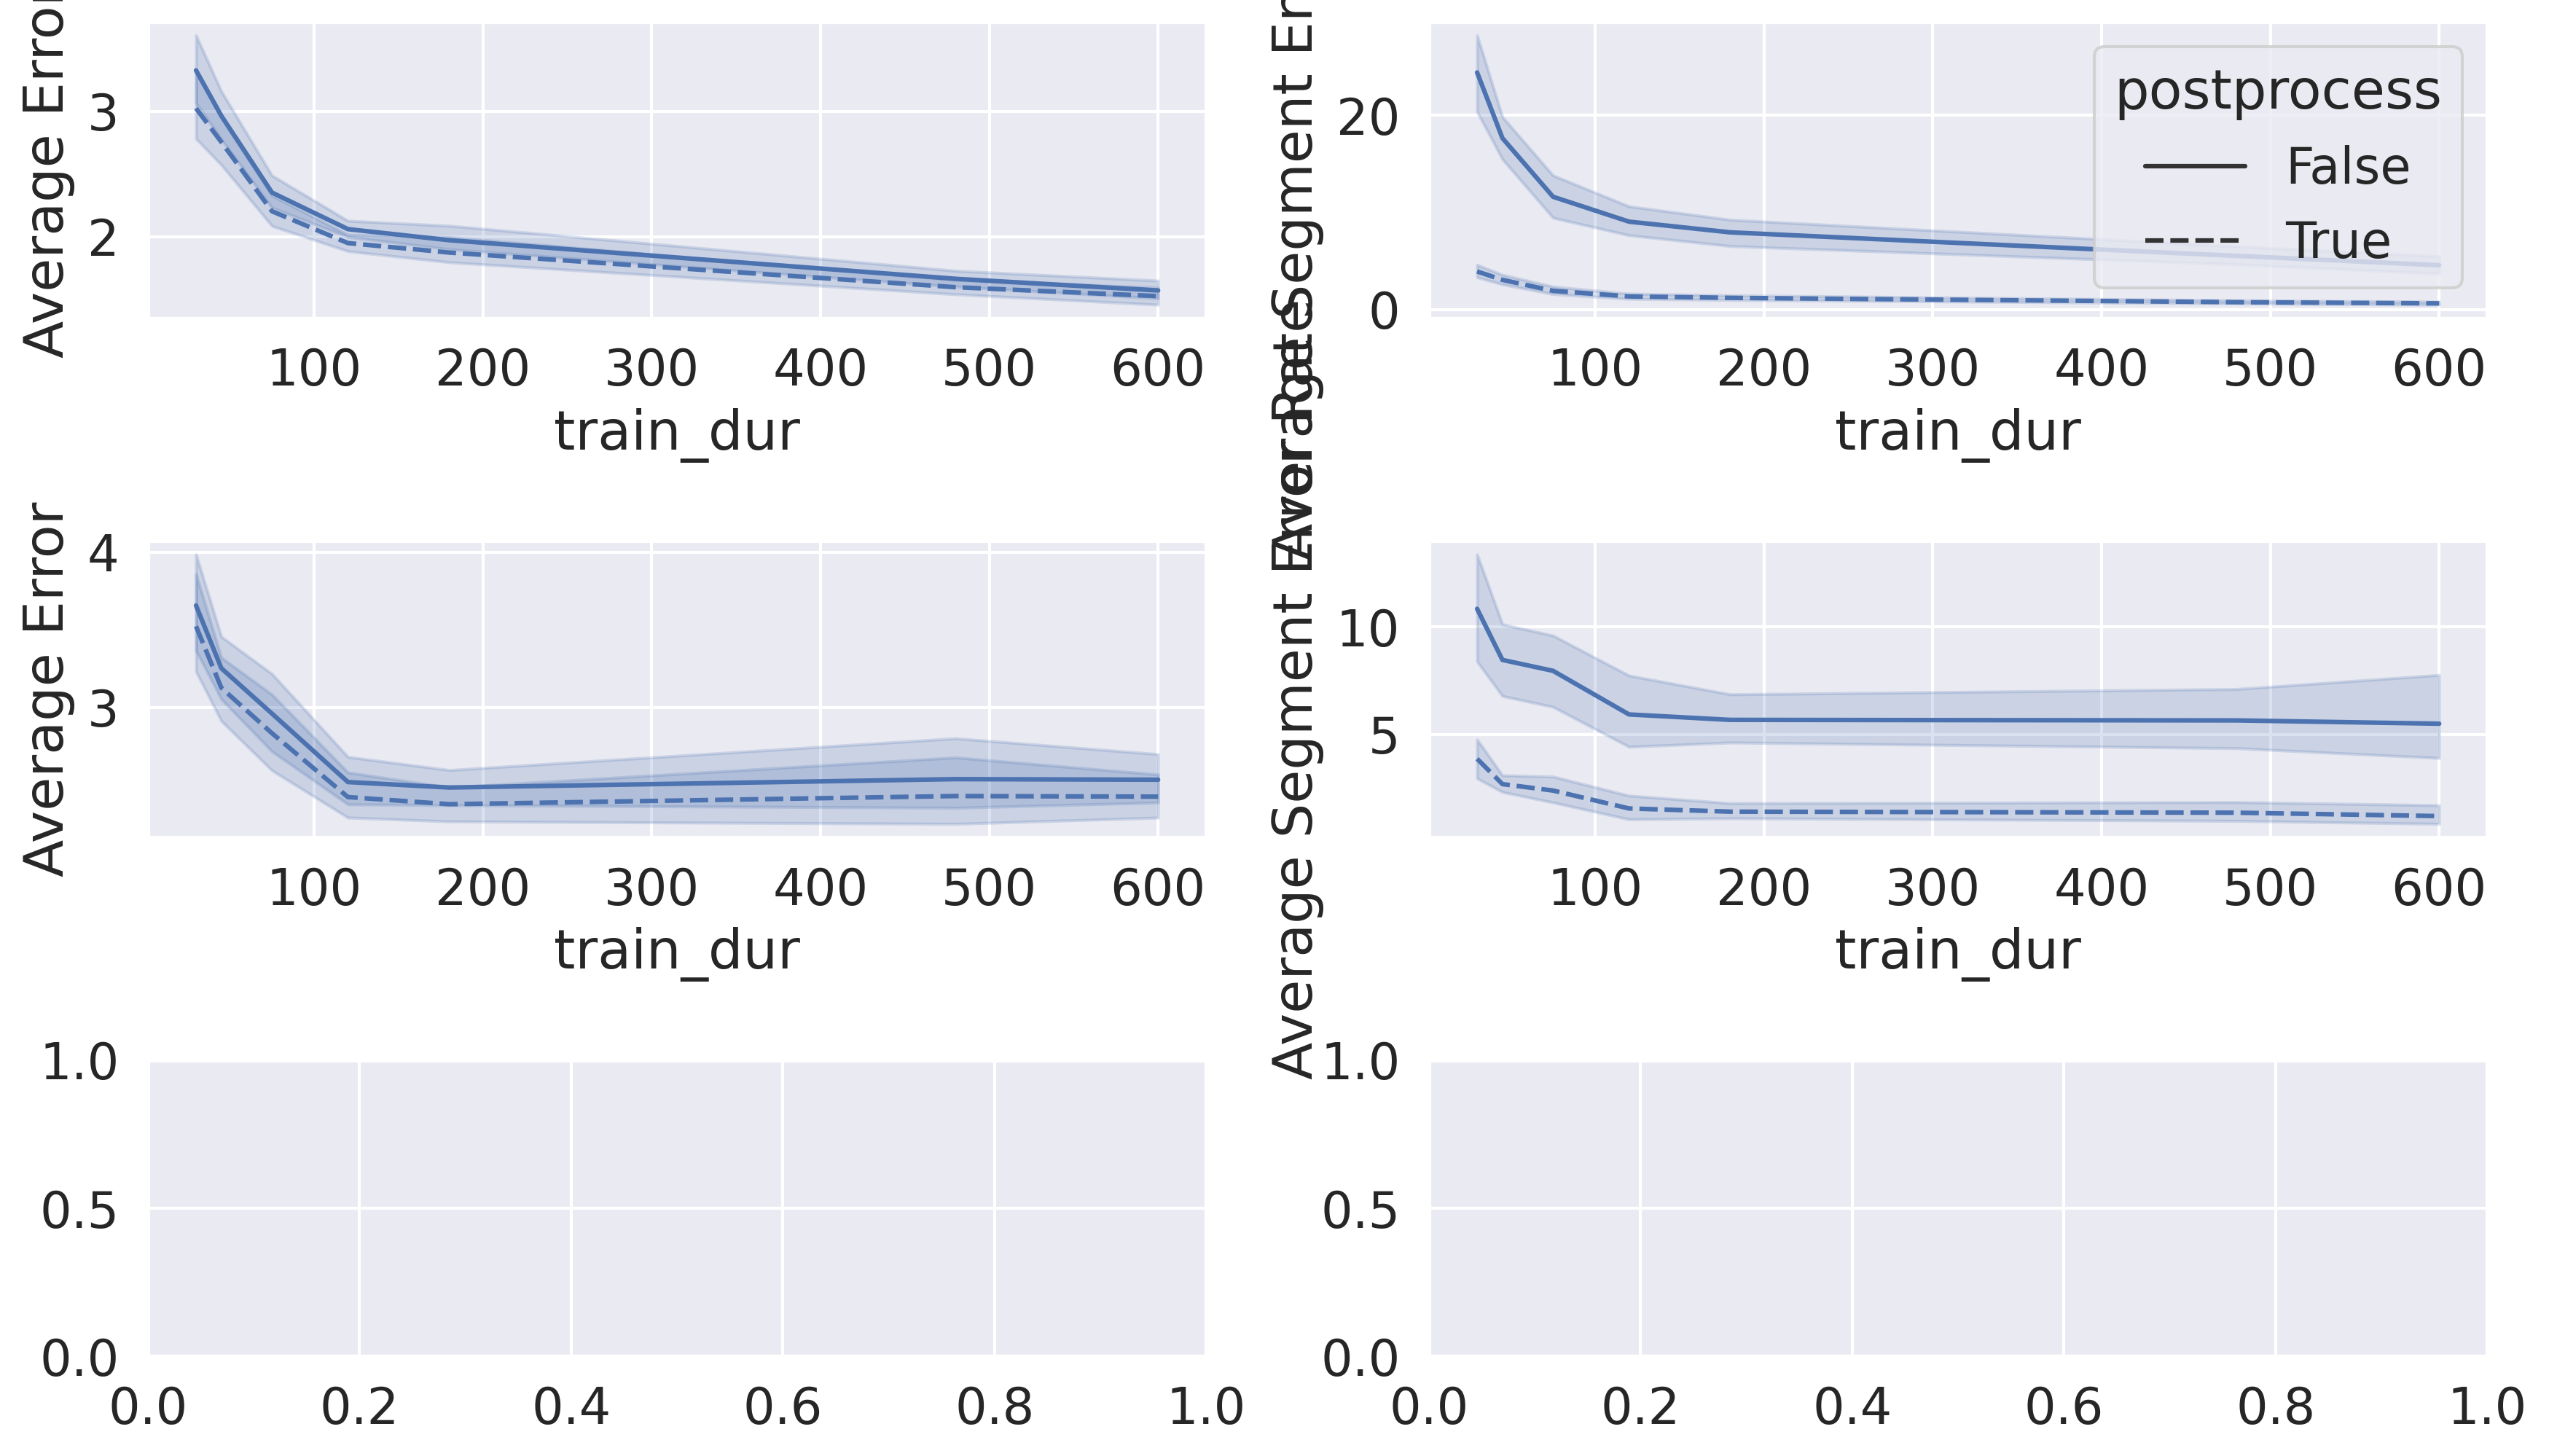

In [17]:
fig, ax_arr = plt.subplots(3, 2, figsize=(12, 7), dpi=300)

for row_ind, model_name in enumerate(data.model_name.unique()):
    data_model = data[data.model_name == model_name]
    
    for col_ind, err_name in enumerate(('Average Error', 'Average Segment Error Rate')):
        ax = ax_arr[row_ind, col_ind]    
        g = sns.lineplot(
            data=data_model,
            x='train_dur',
            y=err_name,
            style='postprocess',
            palette='pastel',
#            style='Input',
            ax=ax,
        )
        if row_ind == 0 and col_ind == 1:
            sns.move_legend(ax, loc='upper right')
        else:
            ax.legend().remove()      
    
    # for ax_ind, ylim in enumerate(([0, 4], [0, 25])):
    #     ax_arr[ax_ind].set_ylim(ylim)
    
# fig.suptitle(f'{bird_id}')
fig.tight_layout()

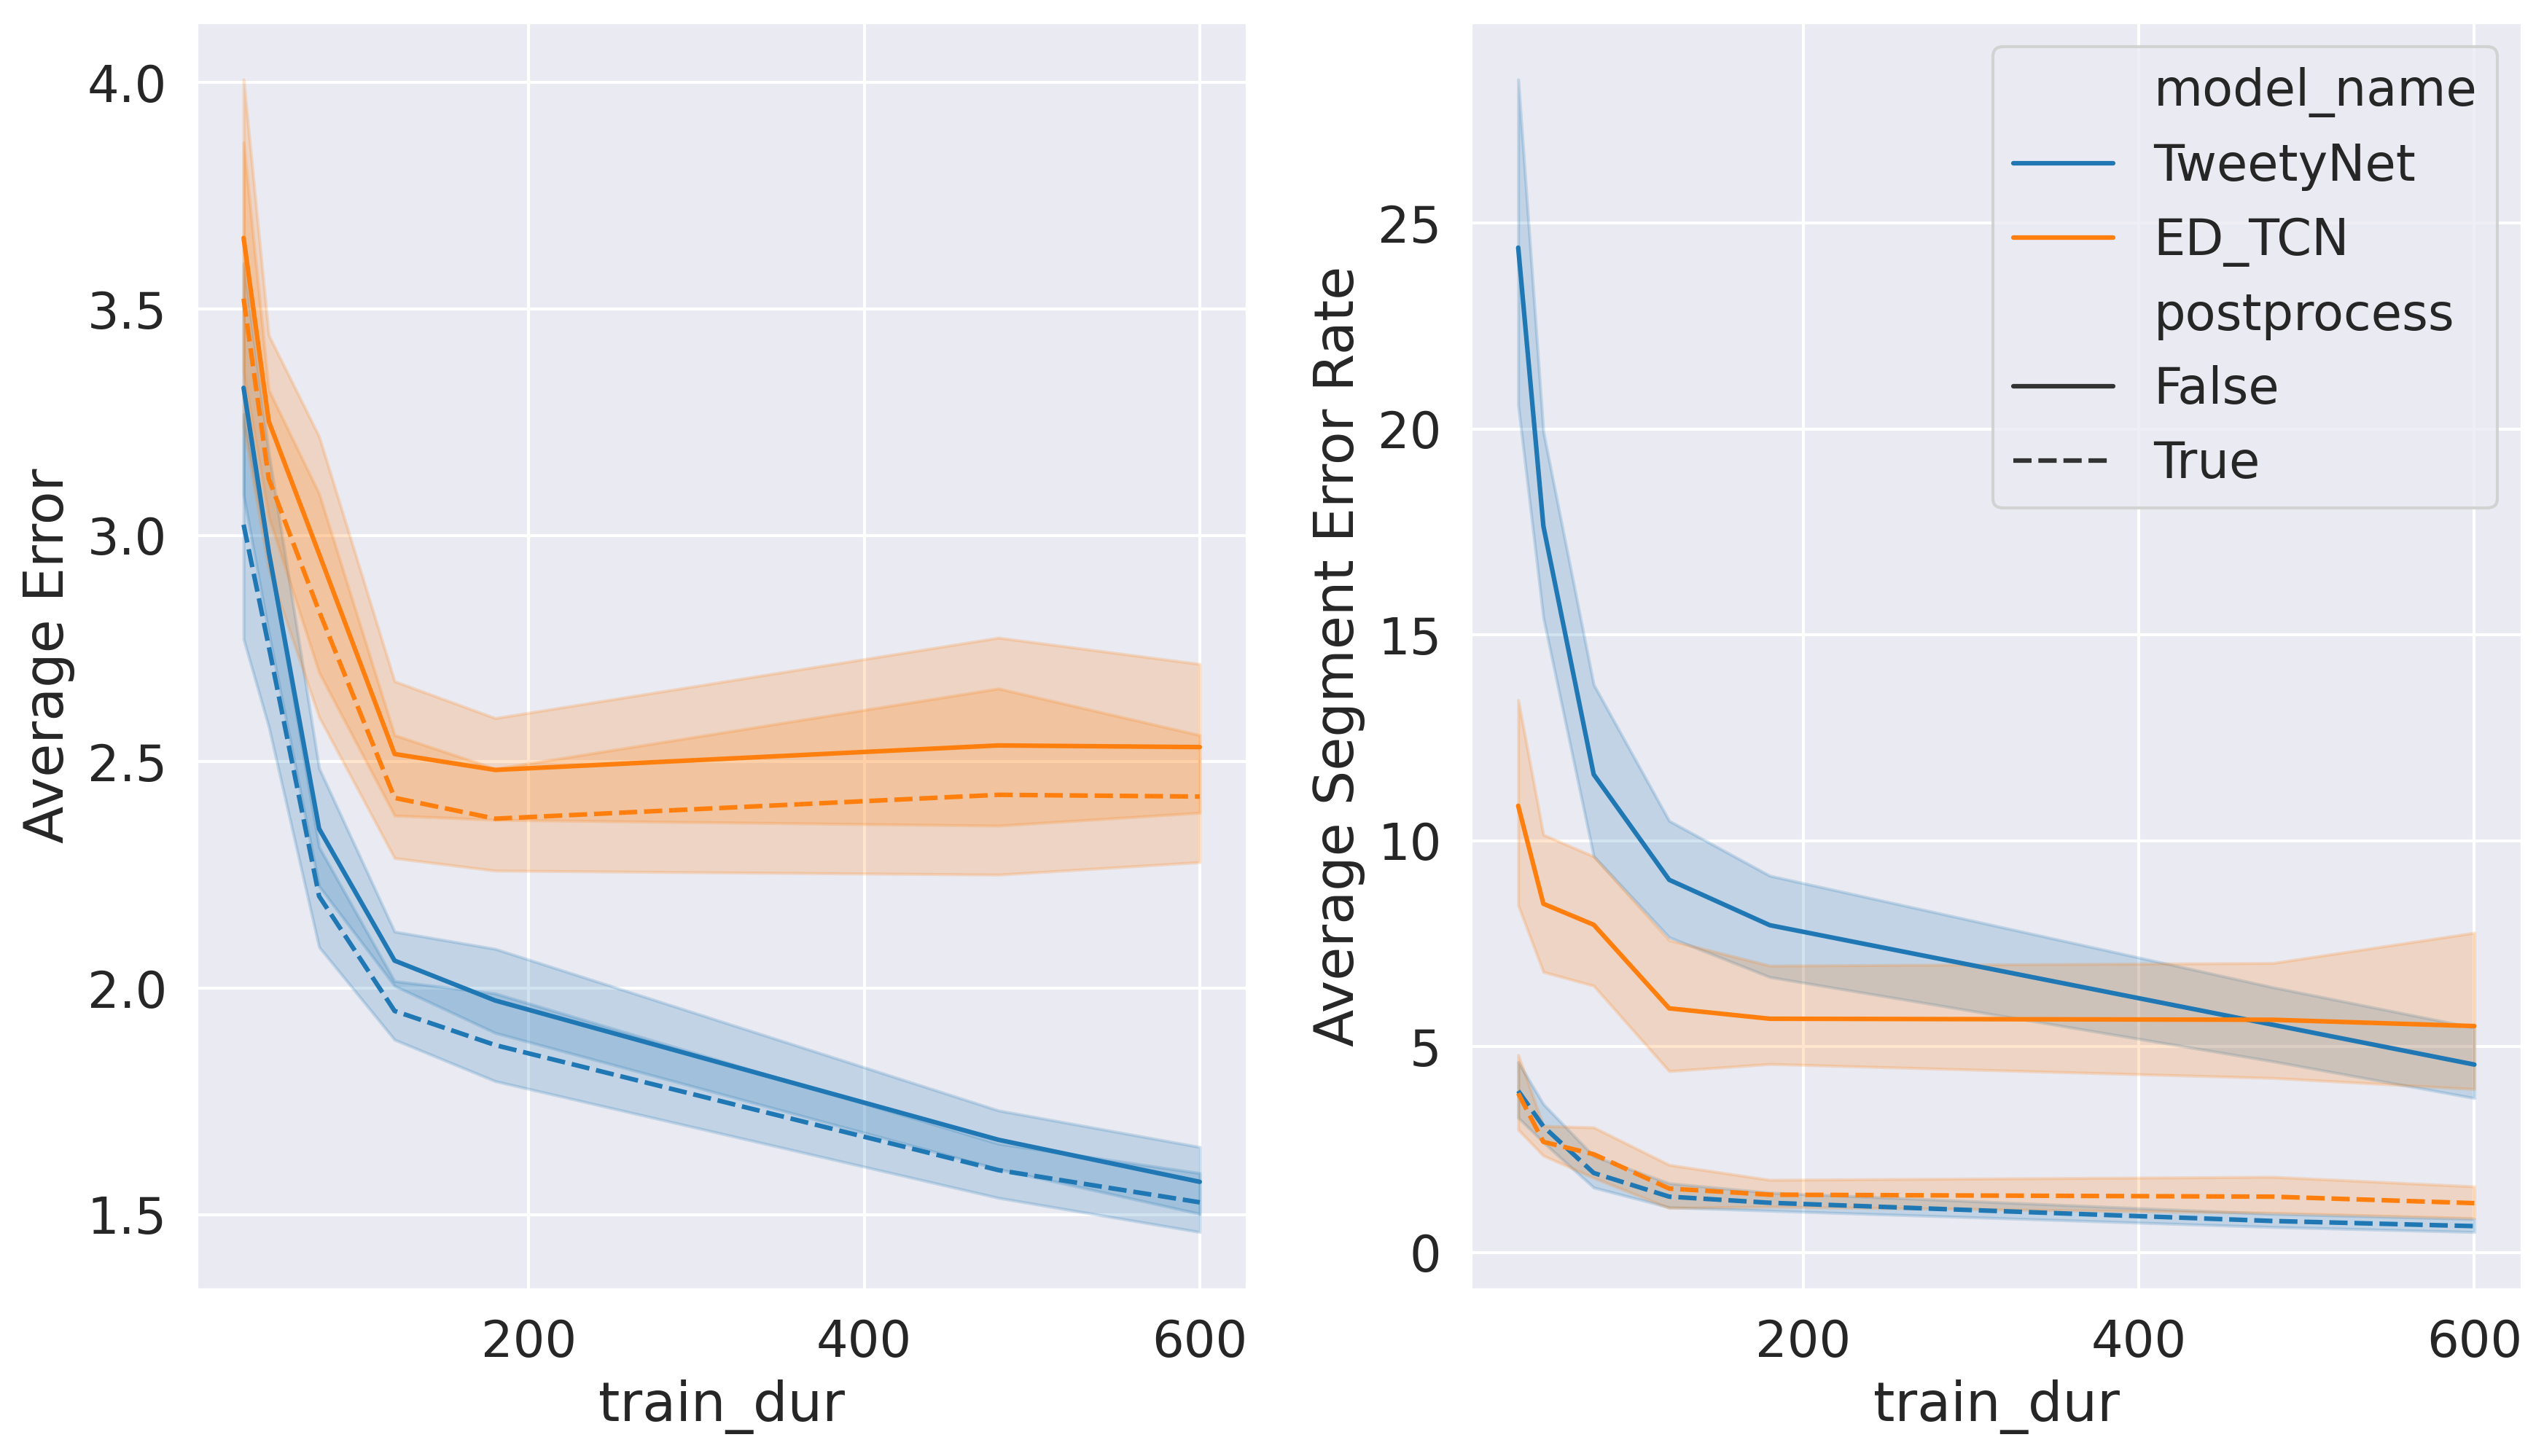

In [19]:
fig, ax_arr = plt.subplots(1, 2, figsize=(12, 7), dpi=300)

for ax_ind, err_name in enumerate(('Average Error', 'Average Segment Error Rate')):
    ax = ax_arr[ax_ind]    
    g = sns.lineplot(
        data=data,
        x='train_dur',
        y=err_name,
        style='postprocess',
        hue='model_name',
        palette='tab10',
        ax=ax,
    )
    if ax_ind == 1:
        sns.move_legend(ax, loc='upper right')
    else:
        ax.legend().remove()      
    
    # for ax_ind, ylim in enumerate(([0, 4], [0, 25])):
    #     ax_arr[ax_ind].set_ylim(ylim)
    
# fig.suptitle(f'{bird_id}')
fig.tight_layout()

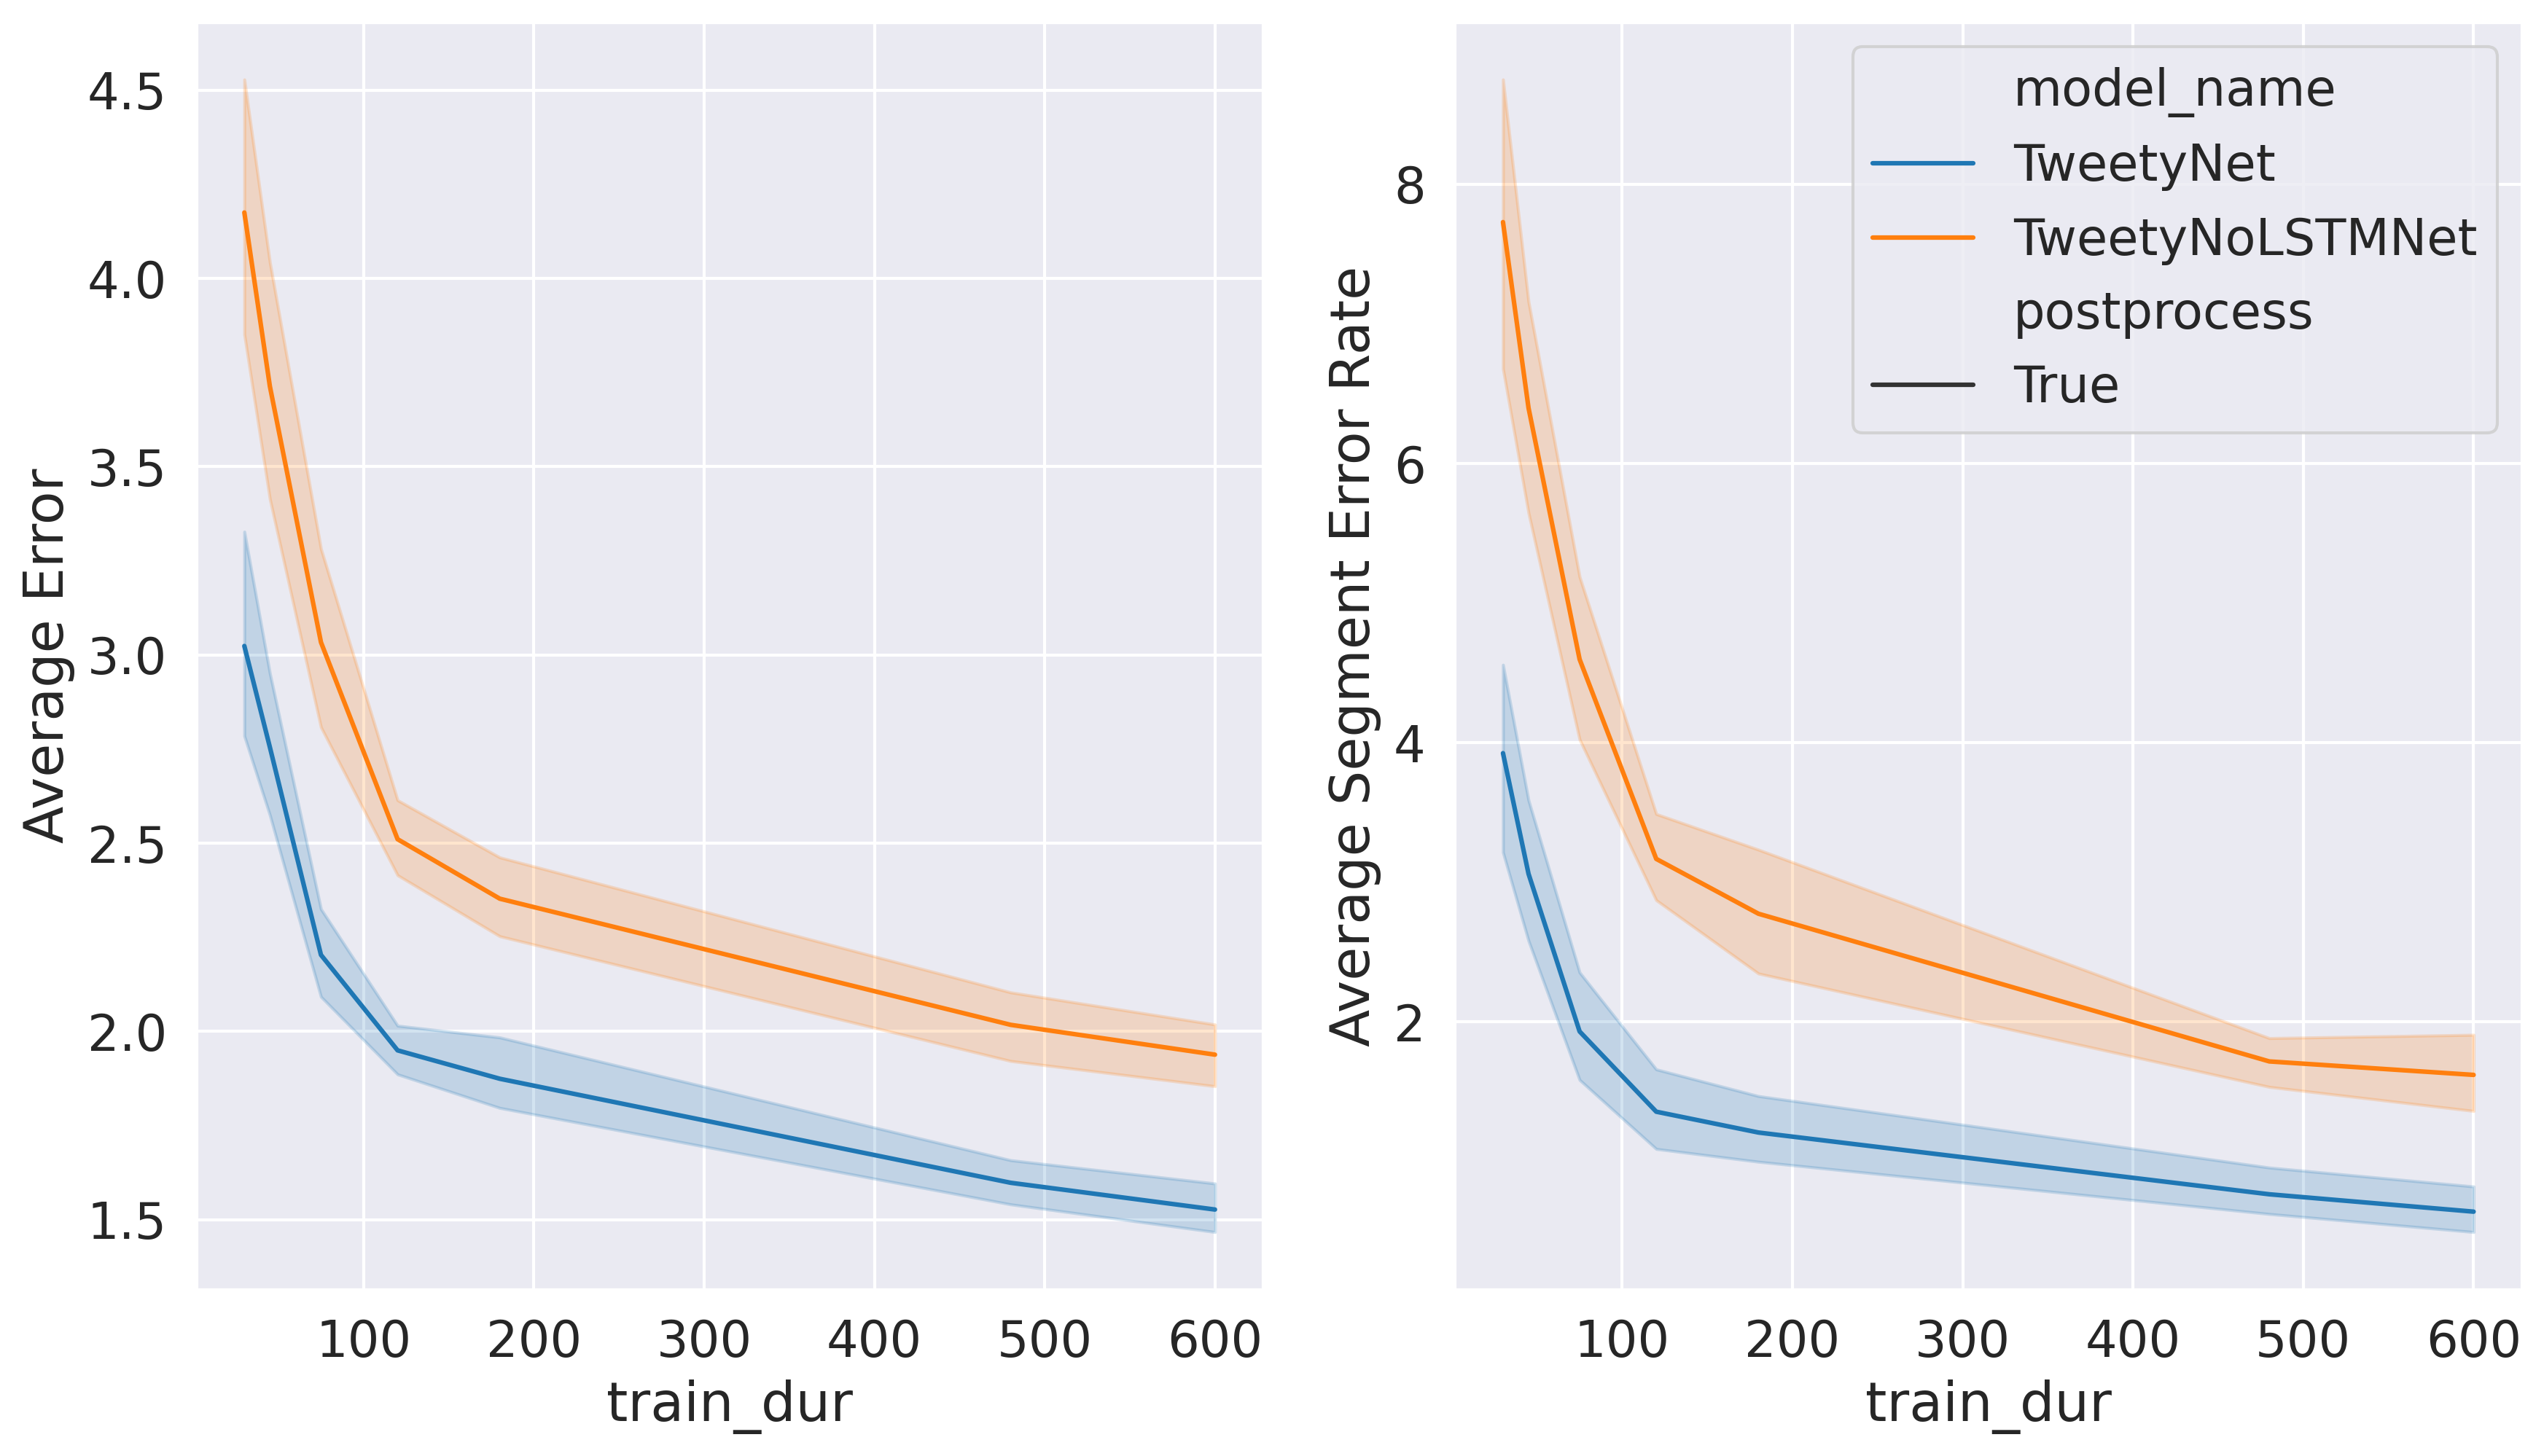

In [12]:
fig, ax_arr = plt.subplots(1, 2, figsize=(12, 7), dpi=300)

data_postprocess = data[data.postprocess == True]

for ax_ind, err_name in enumerate(('Average Error', 'Average Segment Error Rate')):
    ax = ax_arr[ax_ind]    
    g = sns.lineplot(
        data=data_postprocess,
        x='train_dur',
        y=err_name,
        style='postprocess',
        hue='model_name',
        palette='tab10',
        ax=ax,
    )
    if ax_ind == 1:
        sns.move_legend(ax, loc='upper right')
    else:
        ax.legend().remove()      
    
    # for ax_ind, ylim in enumerate(([0, 4], [0, 25])):
    #     ax_arr[ax_ind].set_ylim(ylim)
    
# fig.suptitle(f'{bird_id}')
fig.tight_layout()

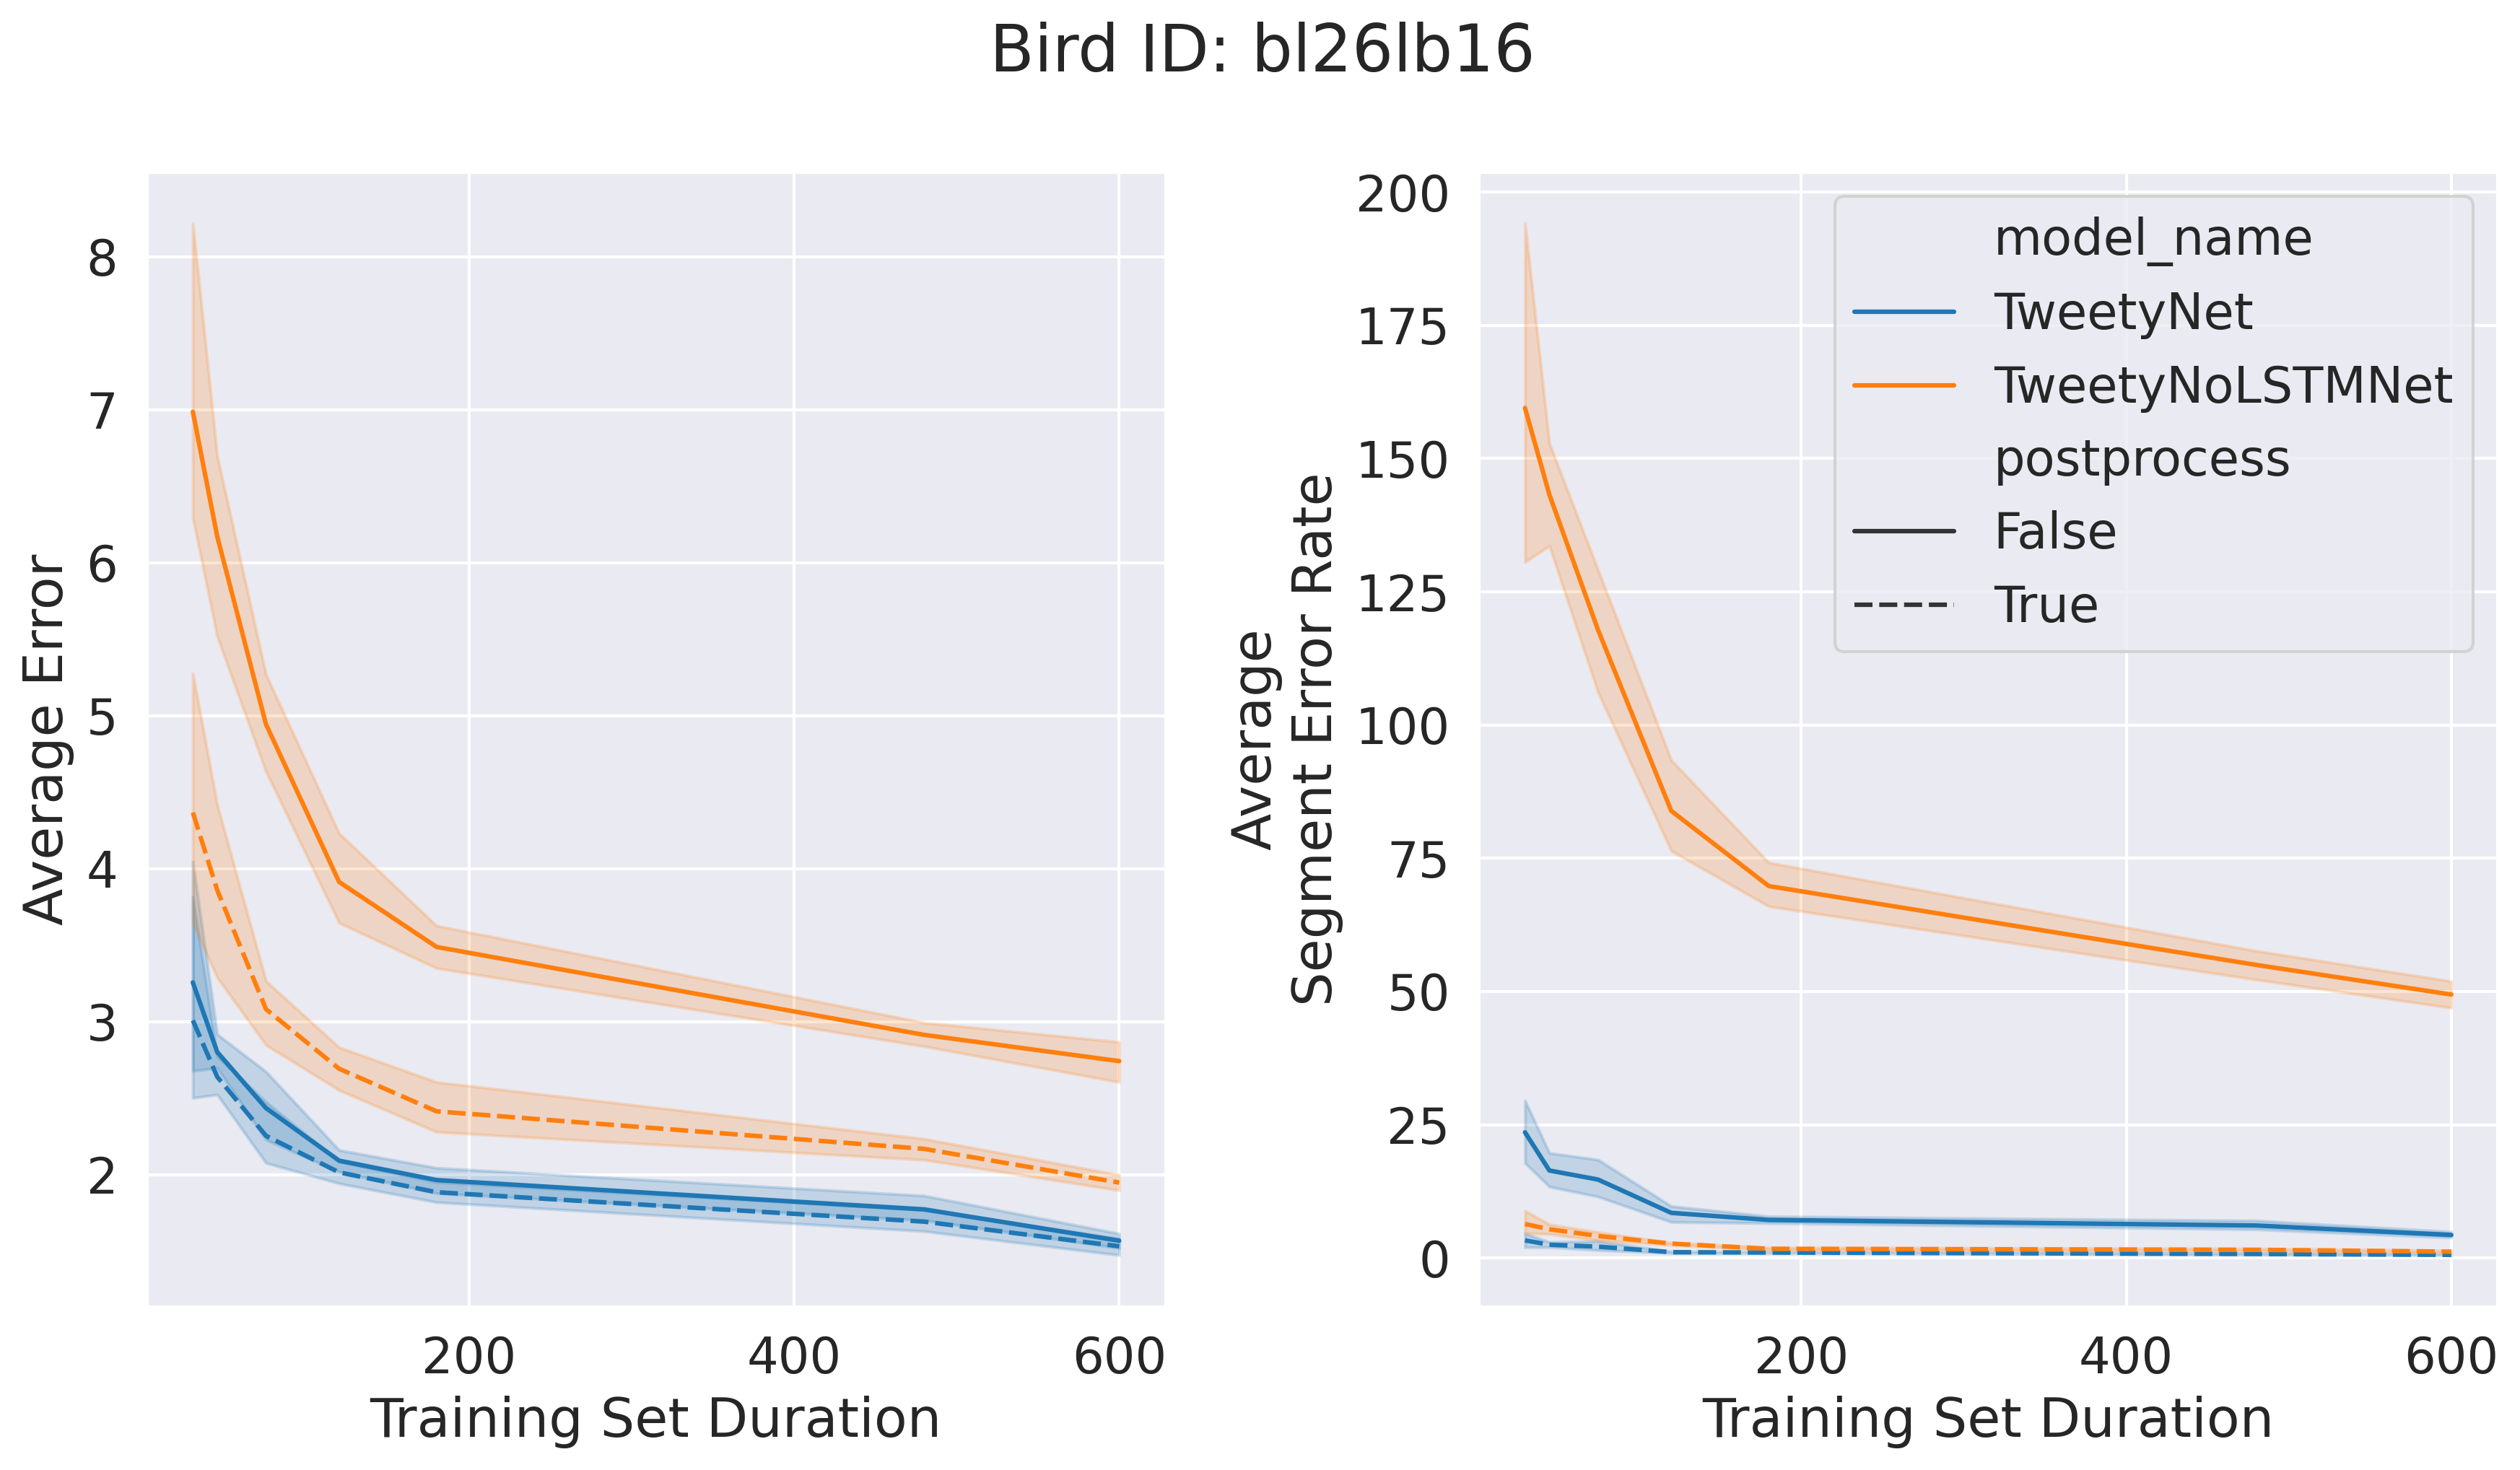

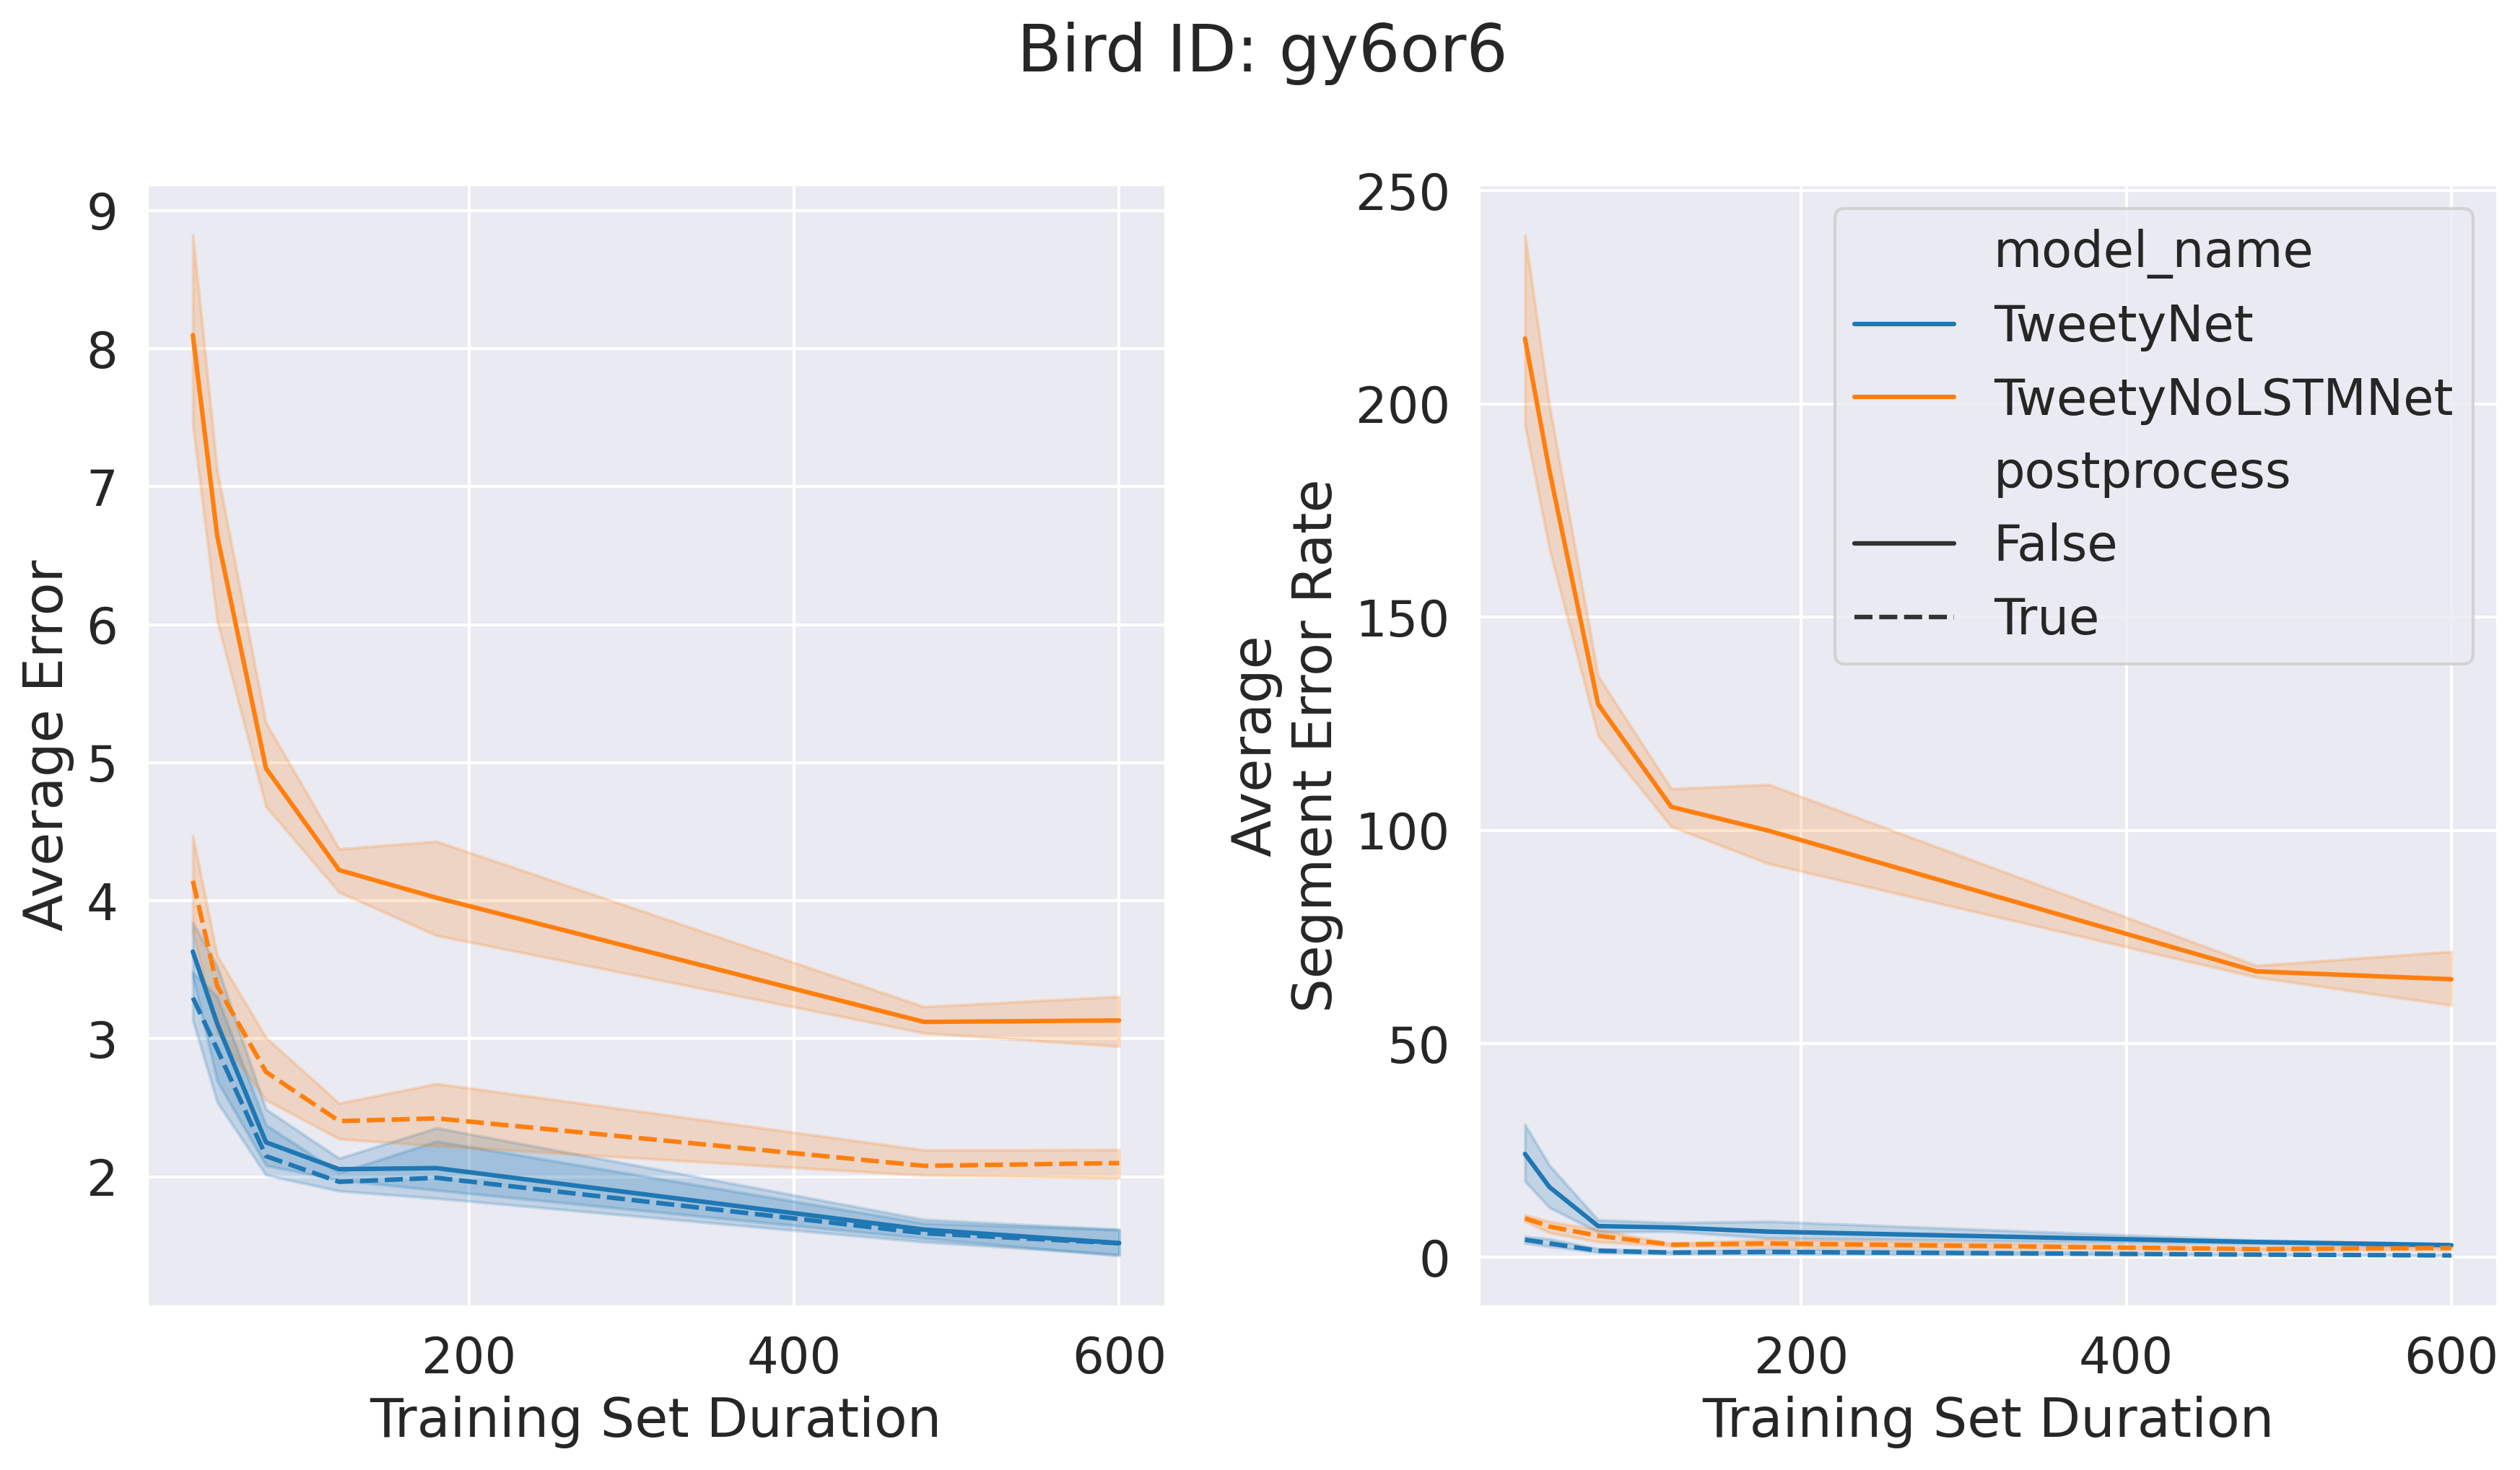

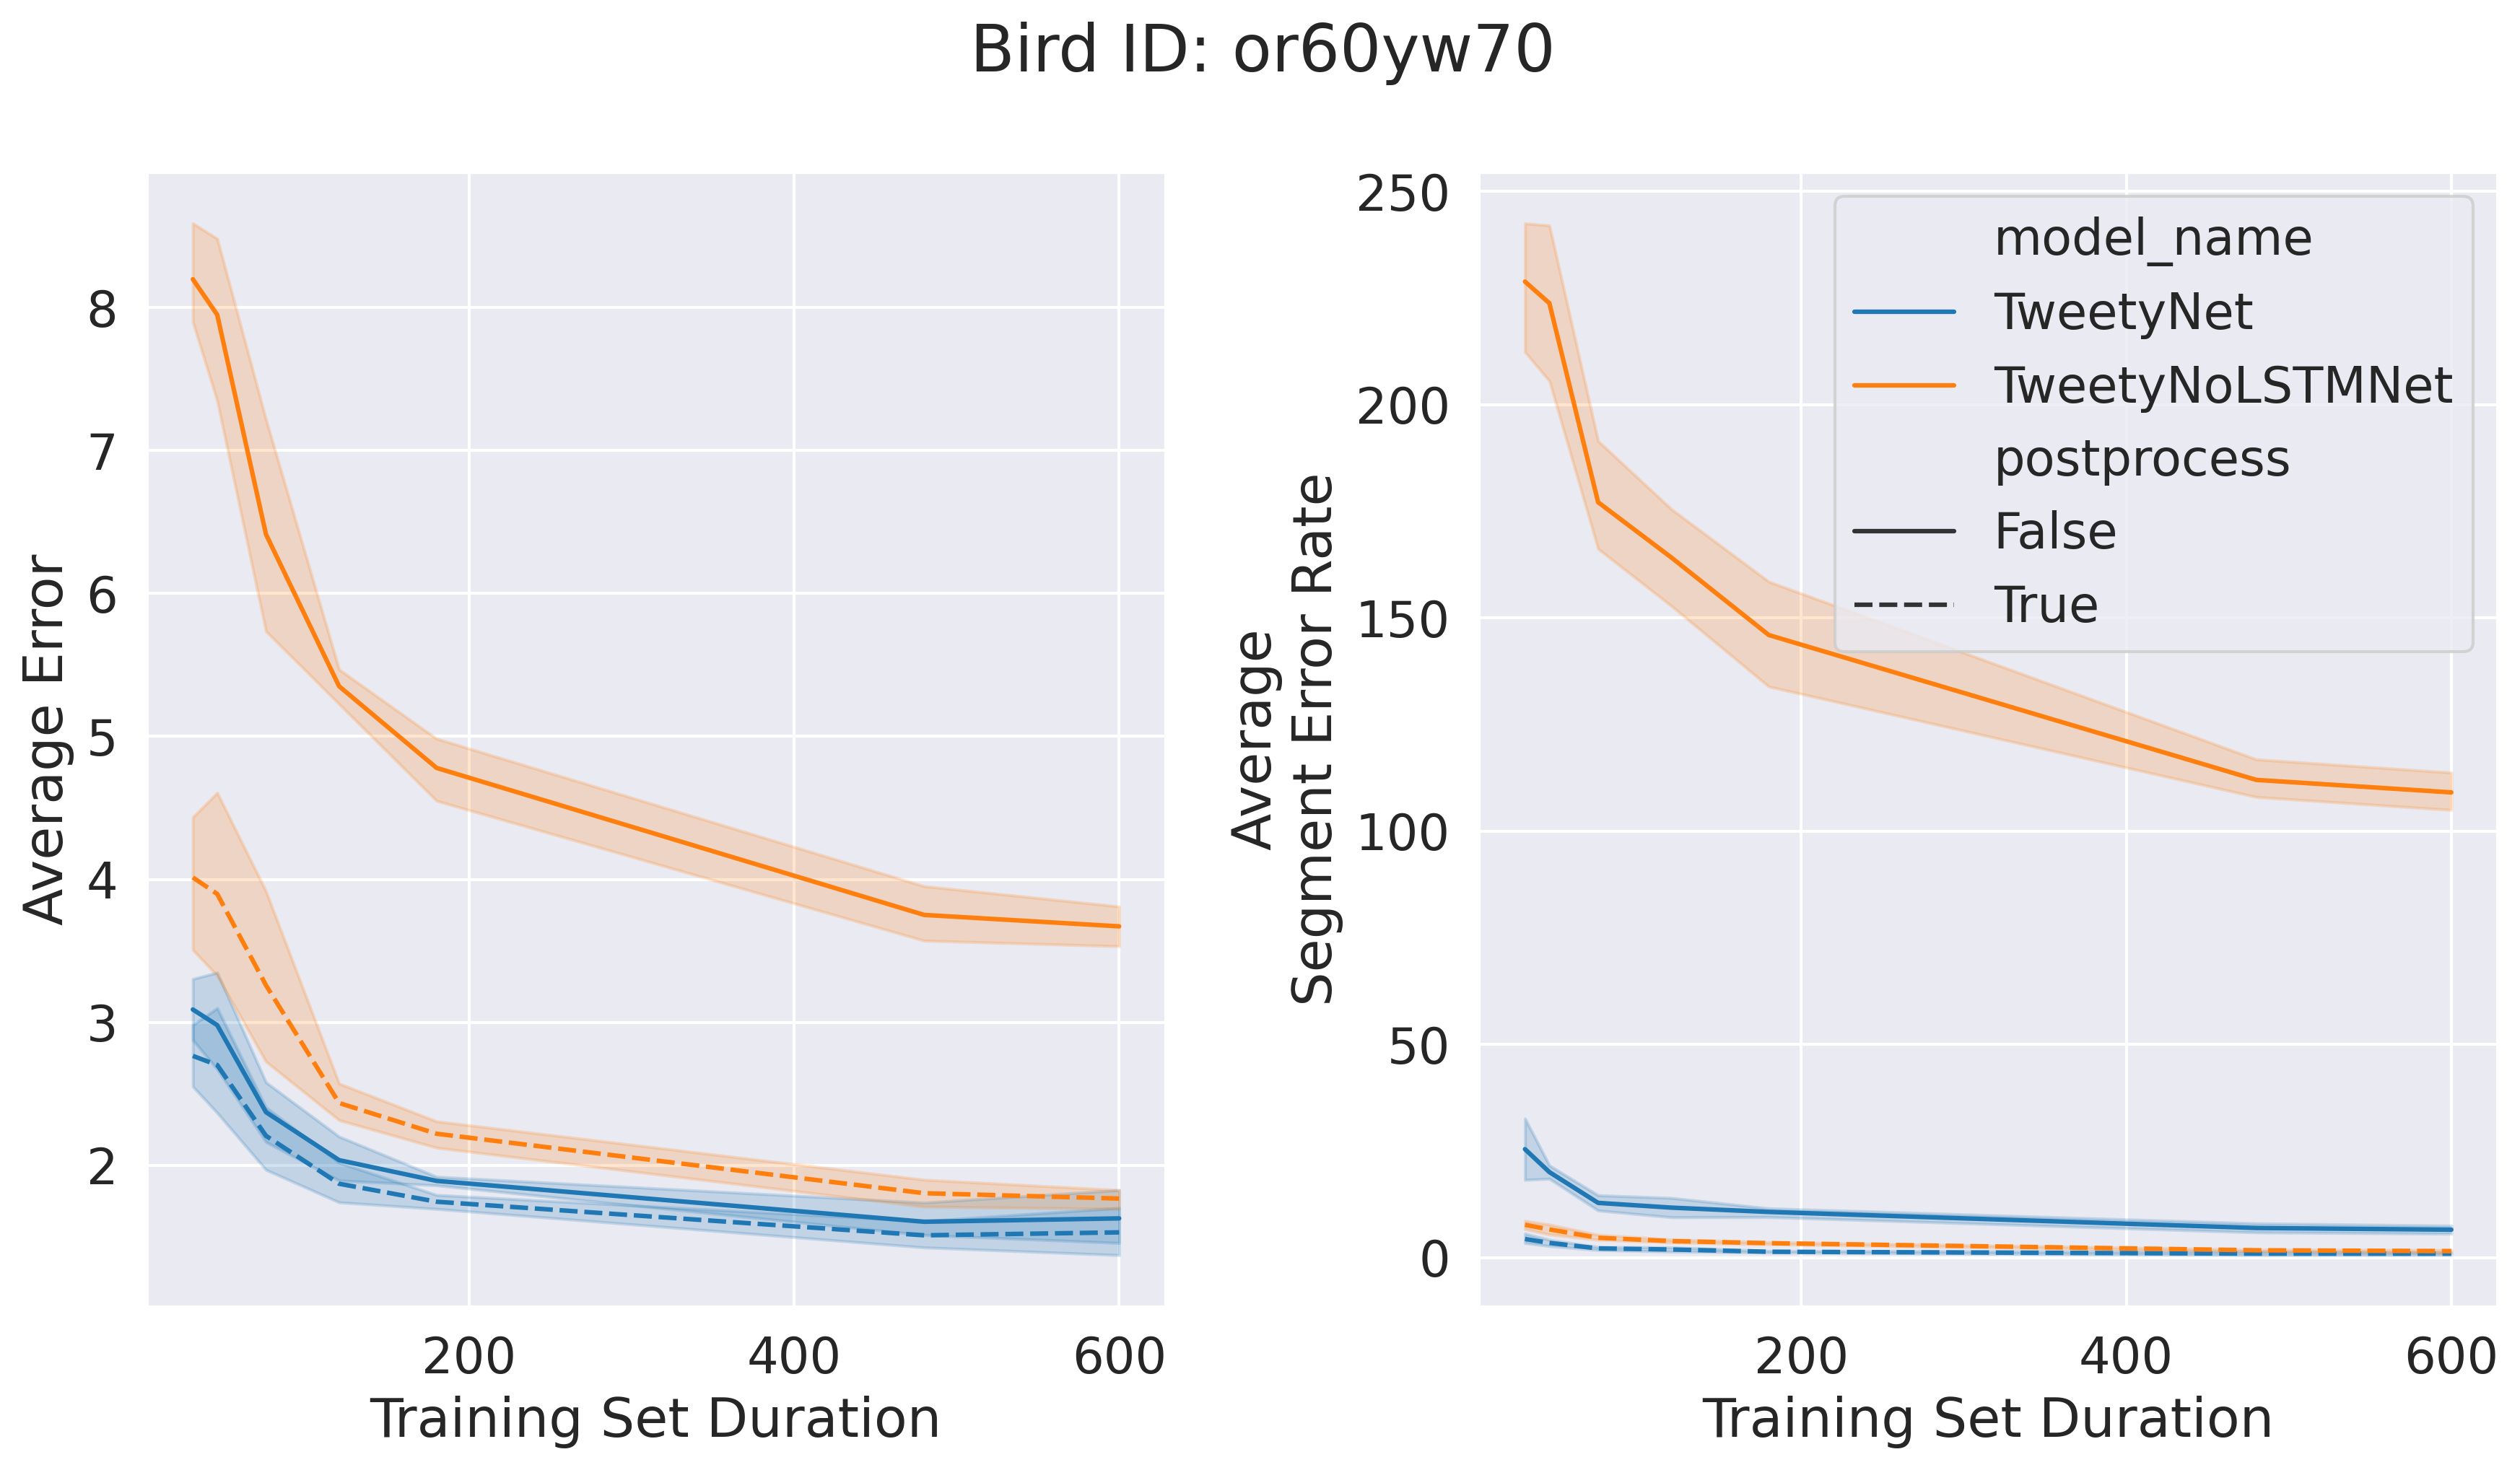

In [11]:
for bird_id in sorted(data.bird_id.unique()):
    fig, ax_arr = plt.subplots(1, 2, figsize=(12, 7), dpi=300)
    
    data_bird = data[data.bird_id == bird_id]
    data_bird = data_bird.rename(columns={'Average Segment Error Rate': 'Average\nSegment Error Rate',
                                          'train_dur': 'Training Set Duration'})
    
    for ax_ind, err_name in enumerate(('Average Error', 'Average\nSegment Error Rate')):
        ax = ax_arr[ax_ind]
        g = sns.lineplot(
            data=data_bird,
            x='Training Set Duration',
            y=err_name,
            style='postprocess',
            hue='model_name',
            palette='tab10',
            ax=ax,
        )
        if ax_ind == 1:
            sns.move_legend(ax, loc='upper right')
        else:
            ax.legend().remove()      
        
        # for ax_ind, ylim in enumerate(([0, 4], [0, 25])):
        #     ax_arr[ax_ind].set_ylim(ylim)
        
    fig.suptitle(f'Bird ID: {bird_id}')
    fig.tight_layout()


Text(0.5, 0.98, 'Error at maximum training set size (10 minutes)')

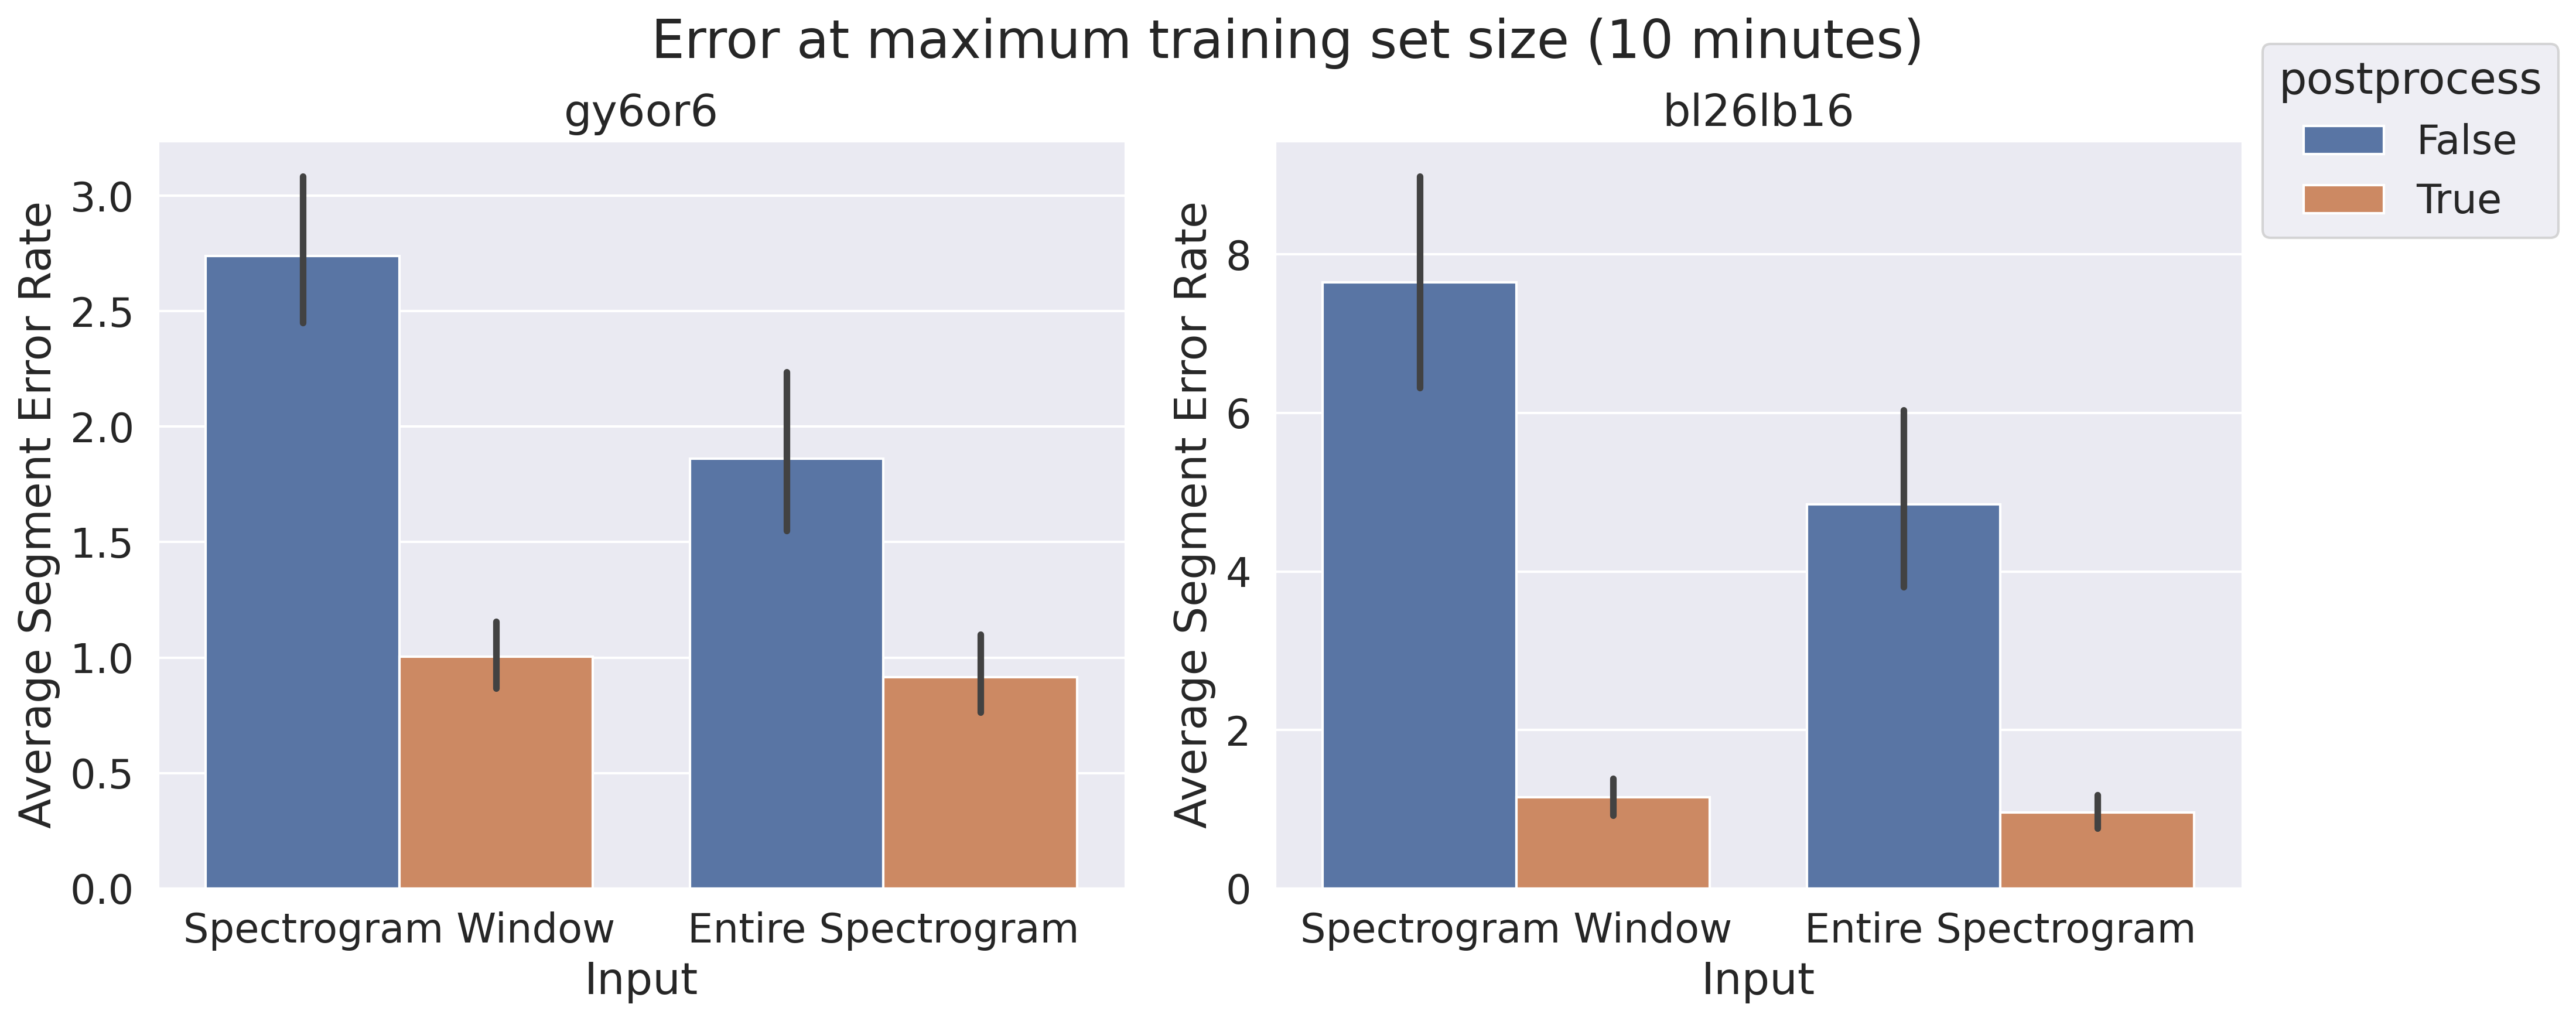

In [49]:
fig, ax_arr = plt.subplots(1, 2, figsize=(15, 6), dpi=300)

for ax_ind, (bird_id, df) in enumerate(bird_id_df_map.items()):
    data = df[df.train_set_dur == 600]
    ax = ax_arr[ax_ind]
    g = sns.barplot(
        data=data,
        y='Average Segment Error Rate',
        x='Input',
        hue='postprocess',
        ax=ax,
    )
    ax.set_title(bird_id)
    if ax_ind == 0:
        ax.legend().remove()
    else:
        sns.move_legend(g, loc='center left', bbox_to_anchor=(1, 1))

fig.tight_layout()
fig.suptitle('Error at maximum training set size (10 minutes)')